
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df=pd.read_csv('C:/Users/prana/Downloads/international-airline-passengers.csv')

In [38]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [39]:
df.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [40]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [41]:
## Drop last 2 rows
df.drop(144,axis=0,inplace=True)

In [42]:
df.tail()

,Month,Sales
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [43]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [44]:
df.head()

,Month,Sales
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [45]:
df.set_index('Month',inplace=True)

In [46]:
df.head()

,Sales
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [47]:
df.describe()

,Sales
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

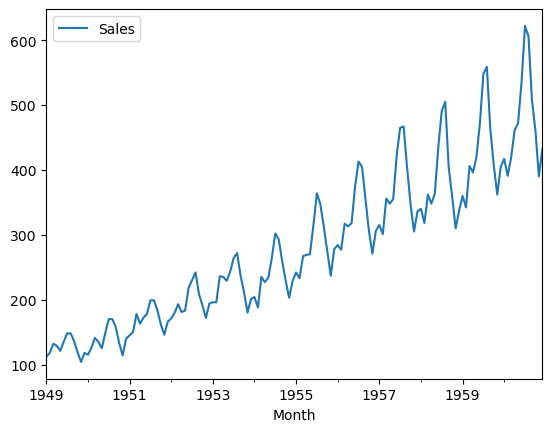

In [48]:
df.plot()

In [49]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [50]:
test_result=adfuller(df['Sales'])

In [51]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [52]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.8153688792060482
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [53]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [54]:
df['Sales'].shift(1)

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: Sales, Length: 144, dtype: float64

In [55]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [56]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,NaN
1949-04-01,129.0,-3.0,NaN
1949-05-01,121.0,-8.0,NaN
1949-06-01,135.0,14.0,NaN
1949-07-01,148.0,13.0,NaN
1949-08-01,148.0,0.0,NaN
1949-09-01,136.0,-12.0,NaN


In [57]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.383020726492481
p-value : 0.011551493085514952
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

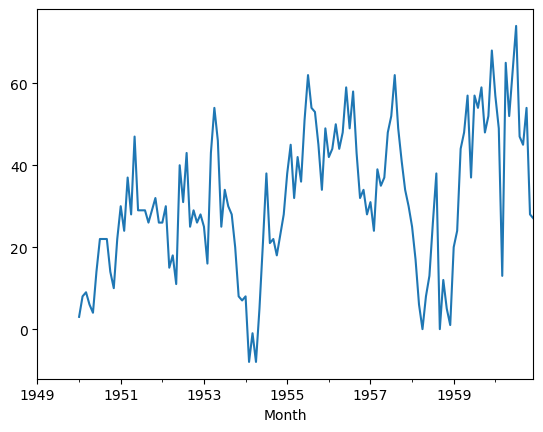

In [58]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
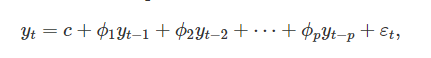

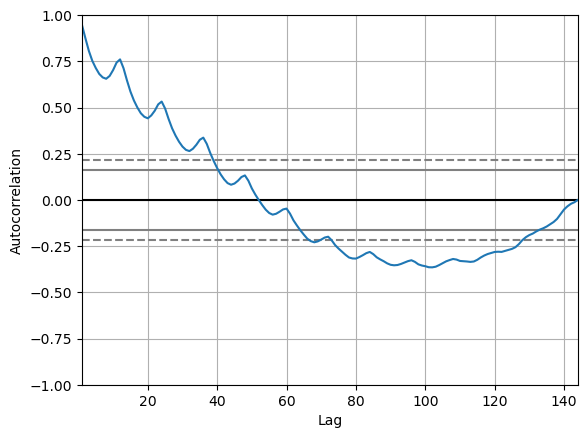

In [59]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [60]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


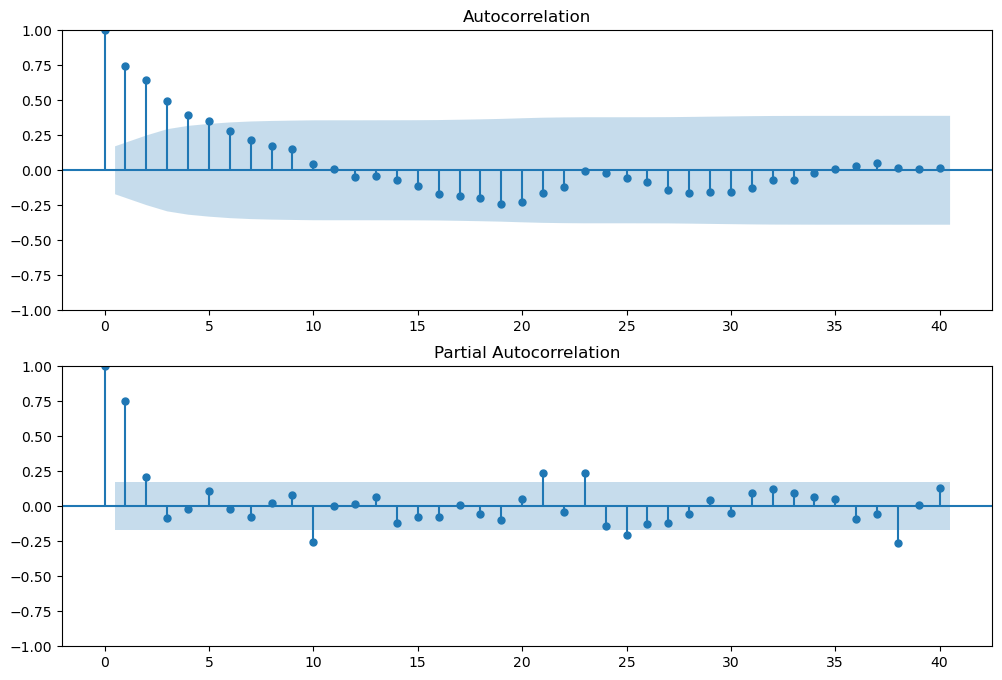

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [64]:
# For non-seasonal data
#p=3, d=1, q=9
from statsmodels.tsa.arima.model import ARIMA

In [65]:
model=ARIMA(df['Sales'],order=(3,1,9))
model_fit=model.fit()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  144
Model:                 ARIMA(3, 1, 9)   Log Likelihood                -644.571
Date:                Thu, 14 Mar 2024   AIC                           1315.142
Time:                        00:10:27   BIC                           1353.659
Sample:                    01-01-1949   HQIC                          1330.794
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0749      0.125     -0.601      0.548      -0.319       0.169
ar.L2         -0.4516      0.095     -4.744      0.000      -0.638      -0.265
ar.L3          0.1067      0.100      1.069      0.285      -0.089       0.302
ma.L1          0.2592    644.646      0.000      1.000   -1263.225    1263.743
ma.L2          0.4108   1171.792      0.000      1.000   -2296.259    2297.081
ma.L3         -0.5090    679.885     -0.001      0.999   -1333.059    1332.041
ma.L4         -0.7001    154.653     -0.005      0.996    -303.814     302.414
ma.L5         -0.7223    156.159     -0.005      0.996    -306.789     305.345
ma.L6         -0.4827    685.191     -0.001      0.999   -1343.433    1342.468
ma.L7          0.3928   1172.360      0.000      1.000   -2297.391    2298.177
ma.L8          0.2778    637.326      0.000      1.000   -1248.858    1249.414
ma.L9          0.9886      0.146      6.788      0.000       0.703       1.274
sigma2       410.3113      2.690    152.515      0.000     405.038     415.584
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.60   Prob(JB):                         0.38
Heteroskedasticity (H):               6.36   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.29e+22. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Month'>

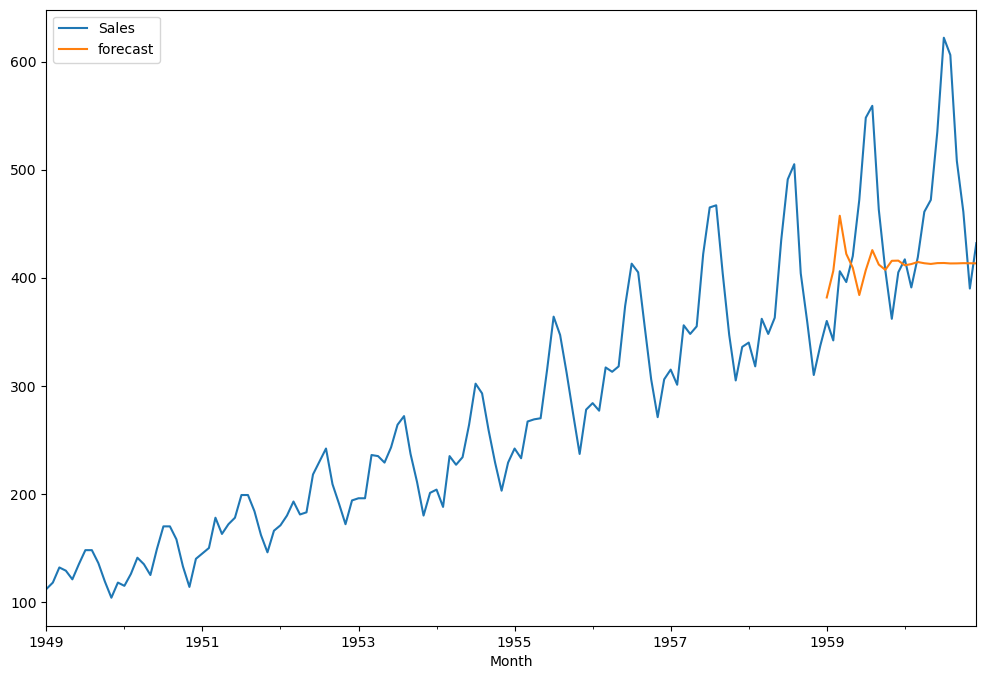

In [70]:
df['forecast']=model_fit.predict(start=120,end=150,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [71]:
import statsmodels.api as sm

In [72]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

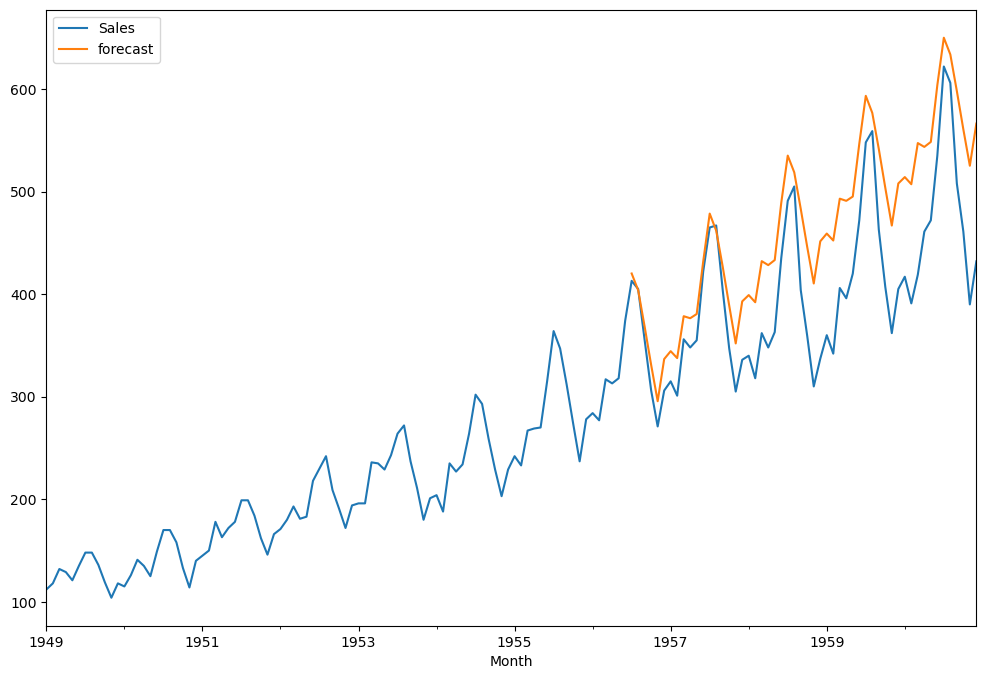

In [74]:
df['forecast']=results.predict(start=90,end=150,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [75]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [76]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [77]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [78]:
future_df=pd.concat([df,future_datest_df])

C:\Users\prana\AppData\Local\Temp\ipykernel_31104\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<AxesSubplot:>

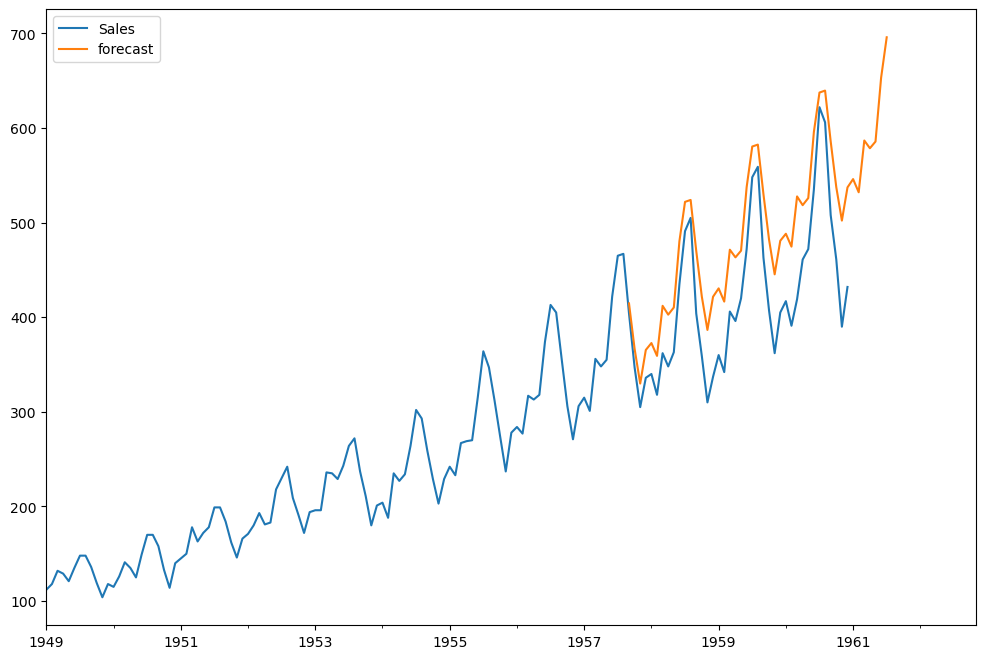

In [80]:
future_df['forecast'] = results.predict(start = 104, end = 150, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 